## Eigen Vectors and Eigen values

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

In [1]:
# Easiest way to understand is through example

import numpy as np
import matplotlib.pyplot as plt

A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [2]:
lambdas, V = np.linalg.eig(A)

In [3]:
# The matrix V contains the eigenvectors as columns for Matrix A - each column in V is an eigenvector
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [4]:
## corresponding eigenvalues for each eigenvector are stored in lambdas
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector:


In [5]:
v = V[:, 0]
v

array([0.86011126, 0.51010647])

In [6]:
lambda_ = lambdas[0] # lambda is a reserved keyword in Python and cannot be used
lambda_

np.float64(1.3722813232690143)

In [7]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [8]:
lambda_ * v

array([1.18031462, 0.70000958])

This proves that $Av = \lambda v$ let us plot this

In [9]:
def plot_vector(vectors, colors):
    plt.figure()
    plt.axvline(x=0, color="lightgray")
    plt.axhline(y=0, color="lightgray")

    for i in range(len(vectors)):
        x = np.concatenate(([0, 0], vectors[i]))
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]], angles="xy", scale_units="xy", scale=1, color=colors[i])

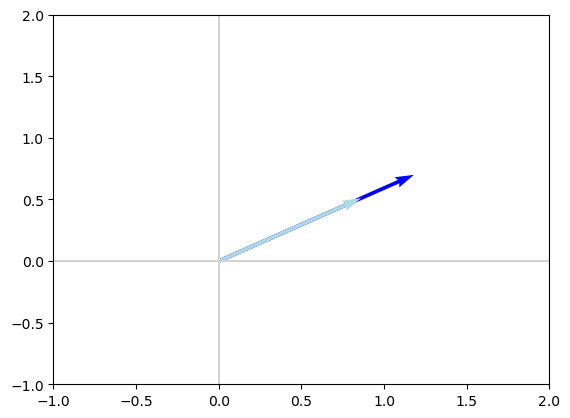

In [10]:
plot_vector([Av, v], ["blue", "lightblue"])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [11]:
## Let us do it for second eigenvector
v2 = V[:, 1]
Av2 = np.dot(A, v2)
lambda_2 = lambdas[1]
v2, lambda_2, Av2, lambda_2 * v2 

(array([-0.76454754,  0.64456735]),
 np.float64(-4.372281323269014),
 array([ 3.34281692, -2.81822977]),
 array([ 3.34281692, -2.81822977]))

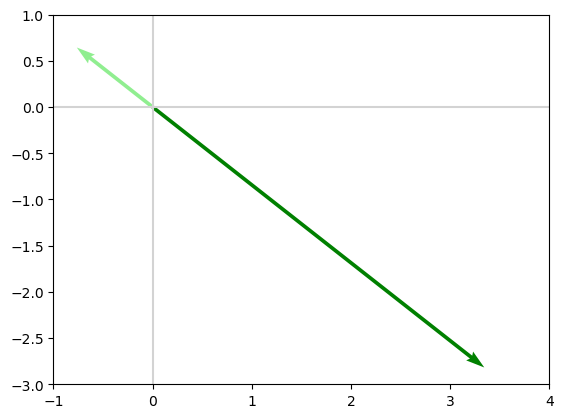

In [12]:
plot_vector([Av2, v2], ["green", "lightgreen"])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 1)

Let us do the same using PyTorch 

In [13]:
import torch

A_pt = torch.tensor([[-1, 4], [2, -2.]])
A_pt

tensor([[-1.,  4.],
        [ 2., -2.]])

In [14]:
eigens = torch.linalg.eig(A_pt)
eigens

torch.return_types.linalg_eig(
eigenvalues=tensor([ 1.3723+0.j, -4.3723+0.j]),
eigenvectors=tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]]))

In [15]:
v1_pt = torch.real(eigens.eigenvectors[:, 0])
v1_pt

tensor([0.8601, 0.5101])

In [16]:
lambda1_pt = torch.real(eigens.eigenvalues[0])
lambda1_pt

tensor(1.3723)

In [17]:
Av1_pt = torch.matmul(A_pt, v1_pt)
Av1_pt

tensor([1.1803, 0.7000])

In [18]:
lambda1_pt * v1_pt

tensor([1.1803, 0.7000])

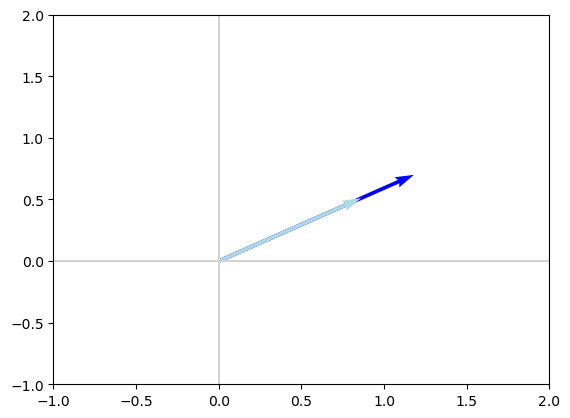

In [19]:
plot_vector([Av1_pt, v1_pt], ["blue", "lightblue"])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [20]:
lambda2_pt = torch.real(eigens.eigenvalues[1])
v2_pt = torch.real(eigens.eigenvectors[:, 1])
Av2_pt = torch.matmul(A_pt, v2_pt)

lambda2_pt, v2_pt, Av2_pt, lambda2_pt * v2_pt

(tensor(-4.3723),
 tensor([-0.7645,  0.6446]),
 tensor([ 3.3428, -2.8182]),
 tensor([ 3.3428, -2.8182]))

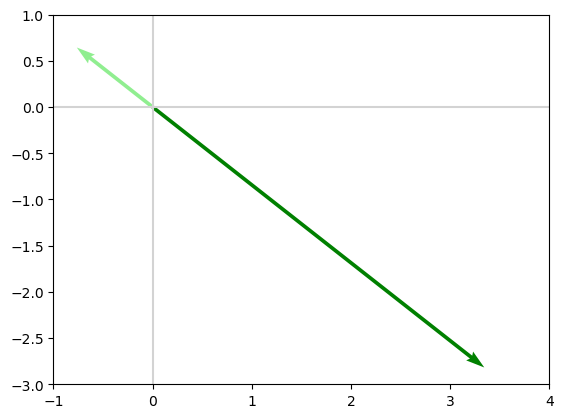

In [21]:
plot_vector([Av2_pt, v2_pt], ["green", "lightgreen"])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 1)